
1 Exploring optimisation of analytic functions

1.1 Rastrigin (3 marks)

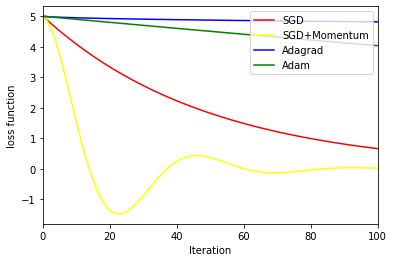

<Figure size 432x288 with 0 Axes>

In [1]:
import torch
import torch.optim as optim
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def Rastrigin(x):
  loss = 2 + x[0]**2 + x[1]**2 - math.cos(2*math.pi*x[0]) - math.cos(2*math.pi*x[1])
  return loss

p_sgd = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt_sgd = optim.SGD([p_sgd], lr=0.01)
loss_sgd = np.empty((2,0))
loss_sgd = np.append(loss_sgd, p_sgd.data.numpy(),axis=1)

p_sgdmom = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt_sgdmom = optim.SGD([p_sgdmom], lr=0.01,momentum=0.9)
loss_sgdmom = np.empty((2,0))
loss_sgdmom = np.append(loss_sgdmom, p_sgdmom.data.numpy(),axis=1)

p_adag = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt_adag = optim.Adagrad([p_adag], lr=0.01)
loss_adag = np.empty((2,0))
loss_adag = np.append(loss_adag, p_adag.data.numpy(),axis=1)

p_adag = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt_adag = optim.Adagrad([p_adag], lr=0.01)
loss_adag = np.empty((2,0))
loss_adag = np.append(loss_adag, p_adag.data.numpy(),axis=1)

p_adam = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt_adam = optim.Adam([p_adam], lr=0.01)
loss_adam = np.empty((2,0))
loss_adam = np.append(loss_adam, p_adam.data.numpy(),axis=1)

maxIter = 100

for i in range(maxIter):
  opt_sgd.zero_grad()
  output_sgd = Rastrigin(p_sgd)
  output_sgd.backward()
  opt_sgd.step()
  loss_sgd = np.append(loss_sgd, p_sgd.data.numpy(),axis=1)

  opt_sgdmom.zero_grad()
  output_sgdmom = Rastrigin(p_sgdmom)
  output_sgdmom.backward()
  opt_sgdmom.step()
  loss_sgdmom = np.append(loss_sgdmom, p_sgdmom.data.numpy(),axis=1)

  opt_adag.zero_grad()
  output_adag = Rastrigin(p_adag)
  output_adag.backward()
  opt_adag.step()
  loss_adag = np.append(loss_adag, p_adag.data.numpy(),axis=1)

  opt_adam.zero_grad()
  output_adam = Rastrigin(p_adam)
  output_adam.backward()
  opt_adam.step()
  loss_adam = np.append(loss_adam, p_adam.data.numpy(),axis=1)

plt.plot(np.arange(0,101,1),loss_sgd[0], c='red', label='SGD')
plt.plot(np.arange(0,101,1),loss_sgdmom[0], c='yellow', label='SGD+Momentum')
plt.plot(np.arange(0,101,1),loss_adag[0], c='blue', label='Adagrad')
plt.plot(np.arange(0,101,1),loss_adam[0], c='green', label='Adam')
plt.xlim(0,100)
plt.xlabel('Iteration')
plt.ylabel('loss function')
plt.legend(loc="upper right")
plt.show()
plt.savefig("loss function.png")

2 Optimisation of a SVM on real data

2.1 Iris SVM (2 marks)

In [0]:
import torch
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'+'/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0) #shuffle

df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter

# add label indices column
mapping = {k: v for v, k in enumerate(df [4]. unique())} 
df[5] = (2 * df[4].map(mapping)) - 1 
#labels in {−1,1}

# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float) 
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)

# create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long) 
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long) 
data_tr = alldata [:75]
data_va = alldata [75:]

In [0]:
from torch.utils import data

dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader

In [35]:
def hinge_loss(y_pred, y_true):
    # YOUR CODE HERE
    loss = torch.mean(torch.clamp(1- y_pred.t() * y_true ,min=0))
    return loss

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

# initialised
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# train
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)

for epoch in range(100):
  sum_loss = 0
  N = len(targets_tr)
  for batch in dataloader:
    opt.zero_grad()
    x = batch[0]
    y = batch[1]
    output = svm(x, w, b)
    loss = hinge_loss(output, y)
    loss.backward()
    opt.step()      
    sum_loss += loss.data.numpy()
  # print(sum_loss/N)

# validation
y_va_pred = svm(data_va, w, b)
acc_va = sum(y_va_pred.detach().numpy() * targets_va.numpy()>=0)/len(data_va)
print(acc_va)

0.88


In [36]:
def hinge_loss(y_pred, y_true):
    # YOUR CODE HERE
    loss = torch.mean(torch.clamp(1- y_pred.t() * y_true ,min=0))
    return loss

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

# initialised
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# train
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)

for epoch in range(100):
  sum_loss = 0
  N = len(targets_tr)
  for batch in dataloader:
    opt.zero_grad()
    x = batch[0]
    y = batch[1]
    output = svm(x, w, b)
    loss = hinge_loss(output, y)
    loss.backward()
    opt.step()      
    sum_loss += loss.data.numpy()
  # print(sum_loss/N)

# validation
y_va_pred = svm(data_va, w, b)
acc_va = sum(y_va_pred.detach().numpy() * targets_va.numpy()>=0)/len(data_va)
print(acc_va)

0.92
